

# <font face = 'calibri' color='red'>Vrush's analysis of the SNAP Reddit Data Set</font>
<p><font size = '4' face = 'calibri' color='black'>There is going to a be variety of different analysis including graph (network) analysis to find interesting behaviors of the people of Reddit. This dataset has a focus on the sentiment (whether it's well meaning or not) of the post  which is the thing that interested me. More of how this was determined could be found in the link below   </font></p>

</p>
  <p>To make the notebook look cleaner as of now I put the data extraction and imports on the bottom to reduce scrolling </p> 
  http://snap.stanford.edu/data/soc-RedditHyperlinks.html

## rank_activity(network (adjacency list)) 
Gets the most relevant subreddits with the most data in the adjacency list. I mostly made this function to get a refresher on how python dictionaries work since I've been doing a lot of cpp for school 


In [3]:
subs = rank_activity(network)[1]
subs_with_most_activity = subs[0 : 10]
data_t = "num_unique_words"# This decides what type of data to look for
body_t = True # This decides whether it looks at titles or the body of the post or title
print(network["cats"])

{'': [], 'pets': [<hyperlink.Hyperlink object at 0x7fede164ea90>, <hyperlink.Hyperlink object at 0x7fede3eafe80>, <hyperlink.Hyperlink object at 0x7fed86d194f0>, <hyperlink.Hyperlink object at 0x7fed7363e1f0>, <hyperlink.Hyperlink object at 0x7fed7681beb0>, <hyperlink.Hyperlink object at 0x7fed76ba6ac0>], 'dogs': [<hyperlink.Hyperlink object at 0x7fede2c6dd00>, <hyperlink.Hyperlink object at 0x7fed935f20a0>, <hyperlink.Hyperlink object at 0x7fed88720fd0>], 'twincitiessocial': [<hyperlink.Hyperlink object at 0x7fedf263dd00>], 'askvet': [<hyperlink.Hyperlink object at 0x7fedd87076a0>, <hyperlink.Hyperlink object at 0x7fedd1f34400>, <hyperlink.Hyperlink object at 0x7fedf6810b20>, <hyperlink.Hyperlink object at 0x7fedf72bc430>, <hyperlink.Hyperlink object at 0x7fed7453e070>, <hyperlink.Hyperlink object at 0x7fed61711be0>], 'comicbooks': [<hyperlink.Hyperlink object at 0x7fedd1654520>], 'rescuecats': [<hyperlink.Hyperlink object at 0x7fedd2025520>, <hyperlink.Hyperlink object at 0x7fed84c9c

In [6]:
df = make_dataframe(network, subs)
print(df)
negative_posts = df.query('negative_sentiment == 1') 
positive_posts = df.query('negative_sentiment == 0')

                    start_sub               end_sub  post_id  body_check  \
0              subredditdrama          reactiongifs  1u7wd5s        True   
1              subredditdrama          reactiongifs  22kenrs        True   
2              subredditdrama          reactiongifs  5rbbuds        True   
3              subredditdrama          reactiongifs   64jo31        True   
4              subredditdrama          reactiongifs  66btdws        True   
...                       ...                   ...      ...         ...   
858483             pokemonrng          shinypokemon  1ubzexs        True   
858484          javascriptart           findareddit  1ua9eks        True   
858485           weirdenglish                 funny  1ua9cds        True   
858486  secondworldanarchists  firstworldanarchists  1u8ujvs        True   
858487       minecraftbattles             minecraft  1u6orvs        True   

       date_posted time_posted  negative_sentiment  num_words  \
0       2014-01-02    

# LIWC_tense relating to sentiment (logistic regression)

## Background 
* LIWC is a text parser that categorizes words into many different things relating to many different topics such as a percentage of the text. A full list of the categories used on this data set could be found here below. Many academic papers use this so it is atleast somewhat a reliable categorizer
    * http://snap.stanford.edu/data/soc-RedditHyperlinks.html
* A plot on one in the y axis on the 3 plots below would represent a post with negative sentiment and a 0 would represent a neutral or positive post according to the sentiment analysis of the people who made the data set.

## Findings

* One of these regression plots by themselves would give decent insight but all three together give a better insight and knowing the period of time in which this data set was gathered gives even MORE insight (2014 - 2017)

### LIWC_present  
    
   * Redditors seem to be more negative as more of their post discusses present events (as determined by LIWC) 
   * The negative things also tend to get most of the press because they get more clicks (more revenue). Since it gets more attention people might post about it more since they hear about it from the news or other more relevant media.  
   * The 2016 US election could be a big reason for this since me as a highschool freshmen back then remember there being many negative headlines and just overall negative sentiment from social media. And many people do get pretty aggressive and emotional (to an unhealthy unextent) when it comes to their politcal standings so I would not be suprised
        
        
### LIWC_past 
    
   * There seems to be a correlation to positive or neutral sentiment if more words in a post have to do with the past when ever the LWIC value is is over .15 (a lot of the posts have values less than .15 which seems like bad data since some words revolving around the past could be used but not be the focus of the post)
   * I thought personally thought it would correlate with positive sentiment due to nostalgia and because of older individuals always talking about the good ol' days.
        * I might do LIWC analysis with VADER values (linear regression instead of logistic) on the Y which is a continuous and not binary like the assigned sentiment but that is repititive in nature so maybe not.
    
### LIWC_future 
    
   * Again there seems to be a postive correlation.
   * I often see people being scared about AI taking over jobs in the future so I expected negative sentiment but new technology is pretty exciting and reddit users tend to be more on the nerdier side than the general population so it somehwhat makes sense. 
        
   
     
    
    
   
 

<IPython.core.display.Javascript object>


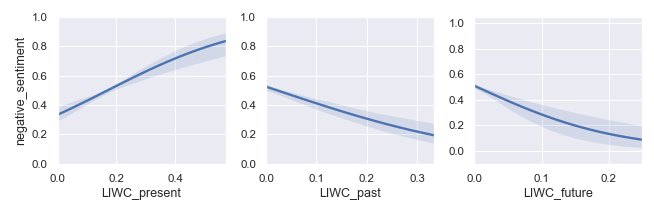

In [81]:
%matplotlib notebook
q = 'LIWC_present > .15 or LIWC_past > .15 or LIWC_future > .15'
# getting a equal amount of both samples to get more accurate information relating to following analysis
sample = pd.concat([negative_posts.query(q).sample(1000), positive_posts.query(q).sample(1000)]) 
# There is alot of data so more samples are needed to get a more accurate picture with tighter confidence interval bounds

f = plt.figure(figsize=(8, 2.6))
gs = f.add_gridspec(1, 3)


ax1 = f.add_subplot(gs[0, 0])
ax1 = sb.regplot(x="LIWC_present", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.05, n_boot = 100, scatter = False)
ax1.set(ylim=(0, 1))

ax2 = f.add_subplot(gs[0, 1])
ax2 = sb.regplot(x="LIWC_past", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter =False)
ax2.set(ylabel = None, ylim=(0, 1))


ax3 = f.add_subplot(gs[0, 2])
ax3 = sb.regplot(x="LIWC_future", y="negative_sentiment", data= sample,
                logistic=True,  y_jitter=.03,n_boot = 100, scatter = False)
ax3.set(ylabel = None, ylim=(0, 1))


plt.ylim(-.102, 1.05)
f.tight_layout()

In [2]:
mega_network = RedditNetwork()
#first make network from hyperlink from bodies of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-body1.tsv")

#second grow network from hyperlinks from titles of posts
mega_network\
    .make_network("/Users/vrushhabh/PycharmProjects/subreddit-conflict-graph-analyzer/soc-redditHyperlinks-title.tsv"
                  ,False)
network = mega_network.get_network() #get the adjacency list

In [1]:
import sys
import jupyterthemes #the themes do not really look that good 
from jupyterthemes import jtplot
sys.path.append('../')
from reddit_network import RedditNetwork 
from network_analyzer import * 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sb
import random
import numpy as np
sb.set_theme()